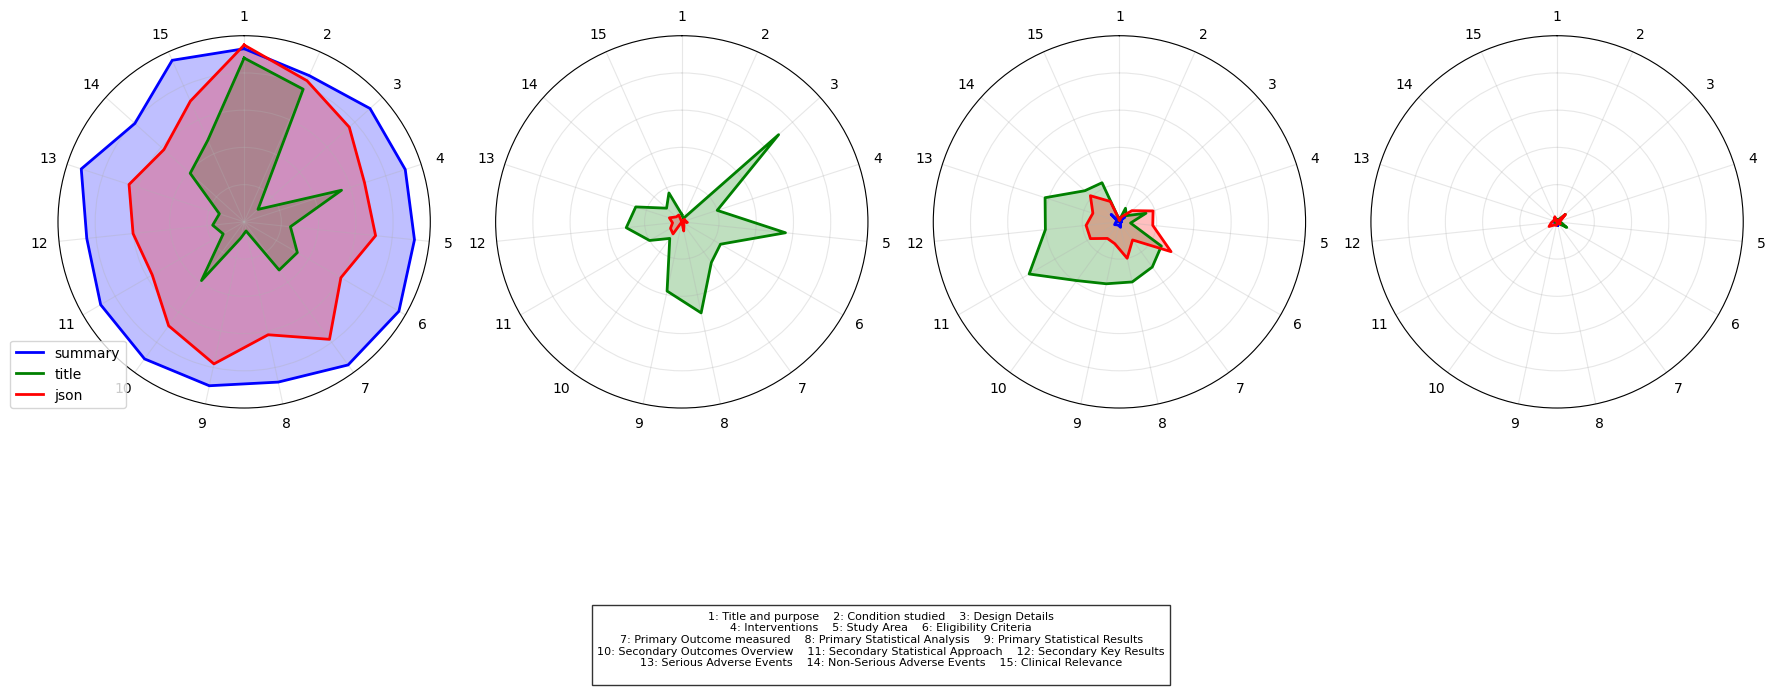

In [8]:
def plot_normalized_label_comparison_radar(csv_paths):
    """
    Create four radar plots with categories legend in 5 columns at the bottom
    """
    dfs = {
        'summary': pd.read_csv(csv_paths['summary']),
        'title': pd.read_csv(csv_paths['title']),
        'json': pd.read_csv(csv_paths['json'])
    }
    
    # Define categories
    categories = {
        1: 'Title and purpose',
        2: 'Condition studied',
        3: 'Design Details',
        4: 'Interventions',
        5: 'Study Area',
        6: 'Eligibility Criteria',
        7: 'Primary Outcome measured',
        8: 'Primary Statistical Analysis',
        9: 'Primary Statistical Results',
        10: 'Secondary Outcomes Overview',
        11: 'Secondary Statistical Approach',
        12: 'Secondary Key Results',
        13: 'Serious Adverse Events',
        14: 'Non-Serious Adverse Events',
        15: 'Clinical Relevance'
    }
    
    # Create figure with space at bottom for categories
    fig = plt.figure(figsize=(18, 8))
    
    # Create gridspec with space for radar plots and category legend
    gs = fig.add_gridspec(2, 4, height_ratios=[4, 1])
    
    # Create axes for radar plots in top row
    axes = [fig.add_subplot(gs[0, i], projection='polar') for i in range(4)]
    
    labels = ['fact', 'hallucination', 'coverage', 'error']
    colors = {'summary': 'blue', 'title': 'green', 'json': 'red'}
    q_order = [i for i in range(1, 16)]
    angles = np.linspace(0, 2*np.pi, len(q_order), endpoint=False)
    
    # Store lines for input type legend
    legend_lines = []
    legend_labels = []
    
    for idx, label in enumerate(labels):
        ax = axes[idx]
        
        for input_type, df in dfs.items():
            rates = []
            for q in q_order:
                q_total = len(df[df['Q'] == q])
                if q_total > 0:
                    q_label_count = len(df[(df['Q'] == q) & (df['Final_label'] == label)])
                    rates.append(q_label_count / q_total)
                else:
                    rates.append(0)
            
            rates.append(rates[0])
            angles_plot = np.concatenate((angles, [angles[0]]))
            
            line = ax.plot(angles_plot, rates, color=colors[input_type], linewidth=2)[0]
            ax.fill(angles_plot, rates, color=colors[input_type], alpha=0.25)
            
            if idx == 0:
                legend_lines.append(line)
                legend_labels.append(input_type)
        
        # ax.set_title(f'{label.capitalize()}')
        ax.set_xticks(angles)
        ax.set_xticklabels(q_order)
        ax.set_ylim(0, 1)
        ax.set_theta_direction(-1)
        ax.set_theta_zero_location('N')
        ax.set_yticklabels([])
        ax.grid(True, alpha=0.3)
    
    # Add input type legend to the first radar plot
    axes[0].legend(legend_lines, legend_labels, 
                  loc='upper right',
                  bbox_to_anchor=(0.2, 0.2))
    
    # Create text for categories in 5 columns
    items_per_column = 3
    num_columns = 5
    category_text = ''
    
    for col in range(num_columns):
        column_items = []
        for i in range(items_per_column):
            idx = col * items_per_column + i
            if idx < len(categories):
                column_items.append(f'{idx+1}: {categories[idx+1]}')
        category_text += '    '.join(column_items) + '\n'
    
    # Add categories legend at bottom
    fig.text(0.5, 0.05, category_text,
             fontsize=8,
             horizontalalignment='center',
             verticalalignment='center',
             bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.savefig('input_type_comparison_radar.png', dpi=600, bbox_inches='tight')
    plt.show()

if __name__ == "__main__":
    csv_paths = {
        'summary': "Paragraph_summary.csv",
        'title': "Paragraph_title.csv",
        'json': "Paragraph_json.csv"
    }
    
    plot_normalized_label_comparison_radar(csv_paths)